**Predictive Analytics for Autism Diagnosis:**

Introduction

Welcome to the Predictive Analytics for Autism Diagnosis project! This Python script is designed to analyze key data points and predict the likelihood of Autism Spectrum Disorder (ASD) in individuals. By employing advanced machine learning models, the script identifies patterns and insights from behavioral scores, demographics, and medical history.

What to expect in this code:
Data Exploration & Preprocessing: 
- The project starts by examining the dataset, addressing missing values, handling outliers, and transforming data to prepare it for analysis.
- Class Balancing: To address the dataset's class imbalance, Synthetic Minority Oversampling Technique (SMOTE) is applied to ensure fair training of the models.
- Model Building: Three machine learning models—Decision Tree, Random Forest, and XGBoost—are trained and evaluated using cross-validation for accuracy, precision, recall, and F1 score.

Insights: Key insights are highlighted, such as the importance of specific features like behavioral scores and screening results in predicting ASD.

Why this matters:

This project demonstrates the potential of predictive analytics in healthcare by offering a data-driven approach to early ASD detection. By identifying the most significant indicators of ASD, this tool provides a valuable resource for healthcare professionals and researchers, enabling more accurate and timely diagnoses.

Let’s dive in and explore how data science can contribute to improving autism diagnosis and support!

In [44]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [4]:
#loading the dataset
df = pd.read_csv(r'C:\Users\PC\Desktop\Datasets\Autism.csv')

In [5]:
#viewing the first five entries
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


Observation
- The dataset contains diverse variables, with the gender column reflecting gender distribution, ethnicity showing some missing data, country_of_res indicating geographical diversity, result representing autism screening scores, age_desc implying adult participants, and Class/ASD denoting autism diagnosis.

In [6]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [7]:
df.shape

(800, 22)

Observation
- The dataset, with a shape of (800, 22), indicates it consists of 800 rows and 22 columns, representing various attributes related to autism screening and diagnosis across a diverse population.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [9]:
# convert age column datatype to integer
df["age"] = df["age"].astype(int)

In [10]:
#Identifying and printing the unique values of non-numerical columns in a df, excluding specified columns like "ID", "age", and "result".
for col in df.columns:
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [11]:
# dropping ID & age_desc column
df = df.drop(columns=["ID", "age_desc"])
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [12]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [13]:
# Standardize country names in the 'contry_of_res' column using the mapping dictionary
# define the mapping dictionary for country names
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

# repalce value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [14]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

The code standardizes country names in a DataFrame column using a mapping dictionary to ensure consistent data.


In [15]:
# taget class distribution
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

**Observations**
- Identified class imbalance 639 (Class 0) vs. 161 (Class 1)
- Dropped ID and age_desc; standardized contry_of_res using a mapping
- Missing values in ethnicity & relation

**Exploratory Data Analysis**

In [16]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


Observations
- A1 to A10 Scores: Binary values (0 or 1).
- Mean Scores: Range from 0.304 (A6) to 0.618 (A10).
- Median Values: Most scores have a median of 0, except A1, A2, A8, A9, and A10, which have a median of 1.
- Distribution: Some scores are almost evenly split between 0 and 1, while others lean more towards 0 or 1.

The scores are mostly binary with varying means and distributions, indicating different tendencies towards 0 or 1 across the scores.

Mean: 27.96375
Median: 24.0


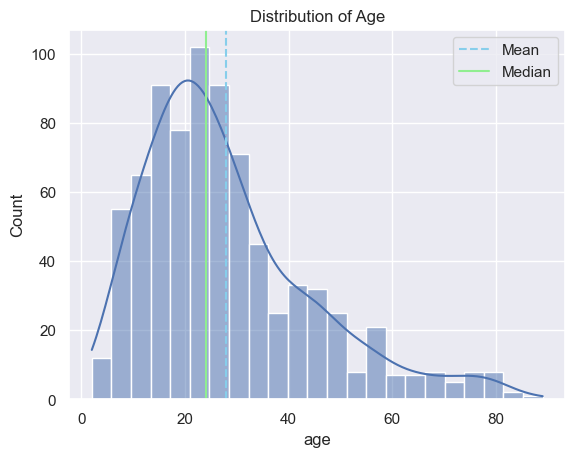

In [17]:
# Histogram for "age"
sns.set_theme(style="darkgrid")

sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

# calculate mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)


# add vertical lines for mean and median
plt.axvline(age_mean, color="skyblue", linestyle="--", label="Mean")
plt.axvline(age_median, color="lightgreen", linestyle="-", label="Median")

plt.legend()

plt.show()

**Observation**
- The plot is left-skewed, indicating a concentration of values toward the higher end, and the mean is less than the median.
- The presence of outliers or a clustered data range could be contributing to the skewness, requiring further investigation or potential transformation to normalize the distribution.

Mean: 8.537303106501248
Median: 9.605299308


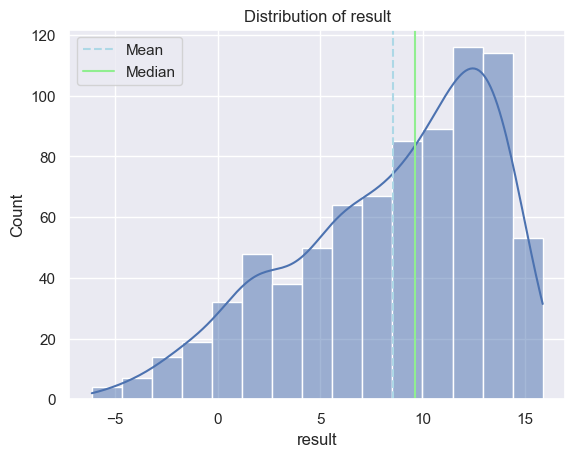

In [18]:
# Histogram for "result"

sns.histplot(df["result"], kde=True)
plt.title("Distribution of result")

# calculate mean and median
result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean:", result_mean)
print("Median:", result_median)


# add vertical lines for mean and median
plt.axvline(result_mean, color="lightblue", linestyle="--", label="Mean")
plt.axvline(result_median, color="lightgreen", linestyle="-", label="Median")

plt.legend()

plt.show()

Observation
- The plot is right-skewed, indicating a concentration of values toward the lower end, with the mean being higher than the median. This suggests a positively skewed distribution, The presence of outliers or a clustered data range could be contributing to the skewness, requiring further investigation.

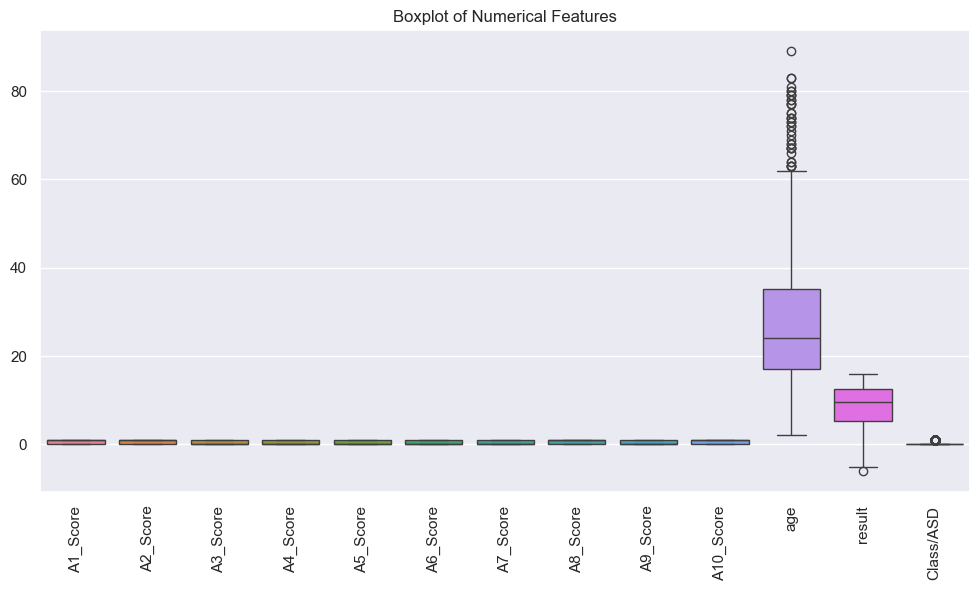

In [19]:
#Box plot visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Observation
- The box plot reveals significant variability in age and some outliers in scores and results, while the Class/ASD feature shows less spread.

In [20]:
# Identify outliers in the 'age' column using the IQR method (1.5 * IQR rule)
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

len(age_outliers)

39

In [21]:
# Outliers Replacement in Age Column
median_value = df['age'].median()
df.loc[(df['age'] < lower_bound) | (df['age'] > upper_bound), 'age'] = median_value

In [22]:
# Identify outliers in the 'Result' column using the IQR method (1.5 * IQR rule)
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

len(result_outliers)

1

In [23]:
# Outliers Replacement in Age Column
median_value = df['result'].median()
df.loc[(df['result'] < lower_bound) | (df['result'] > upper_bound), 'result'] = median_value

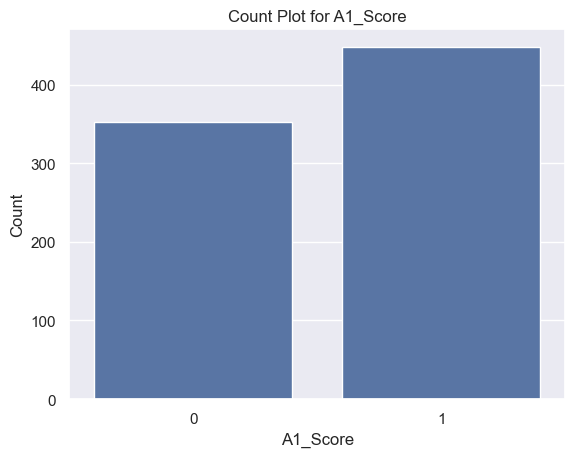

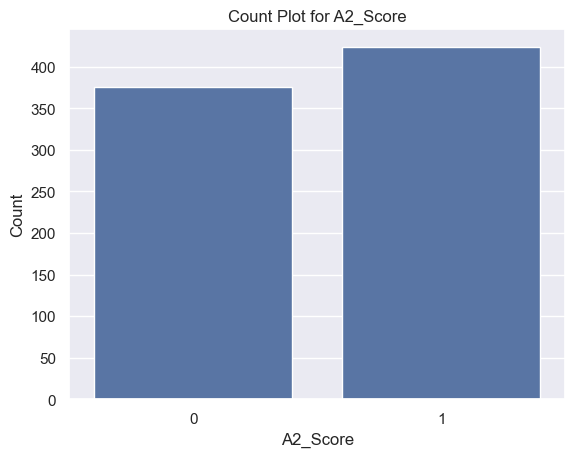

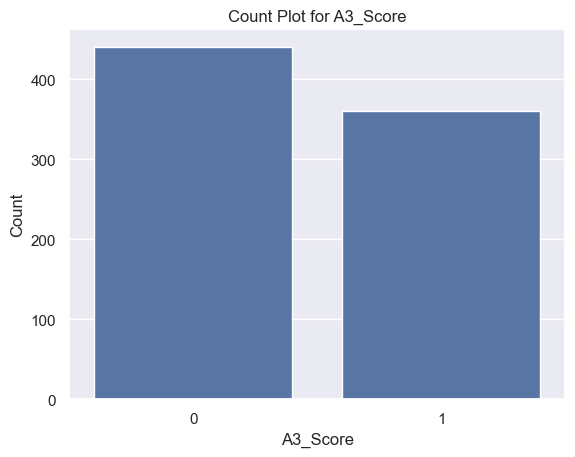

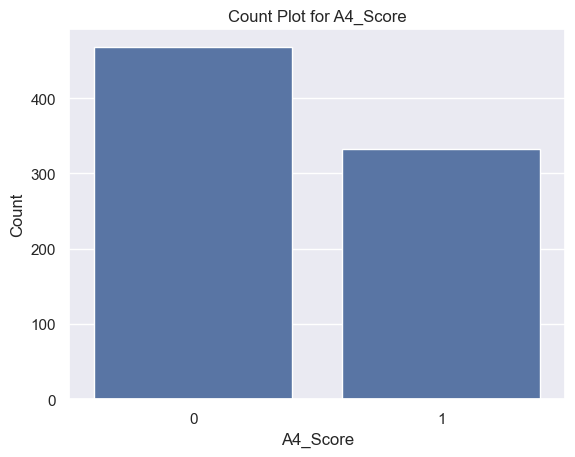

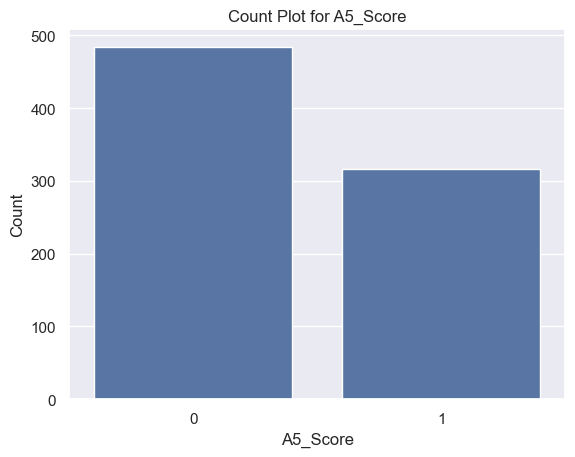

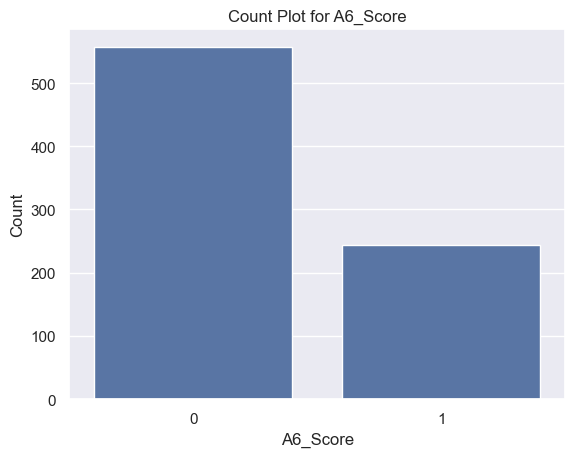

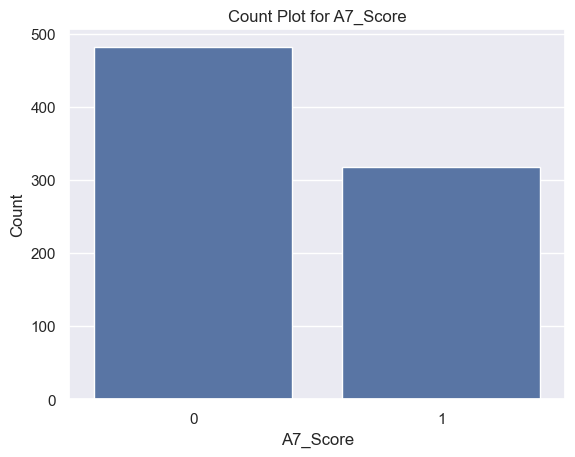

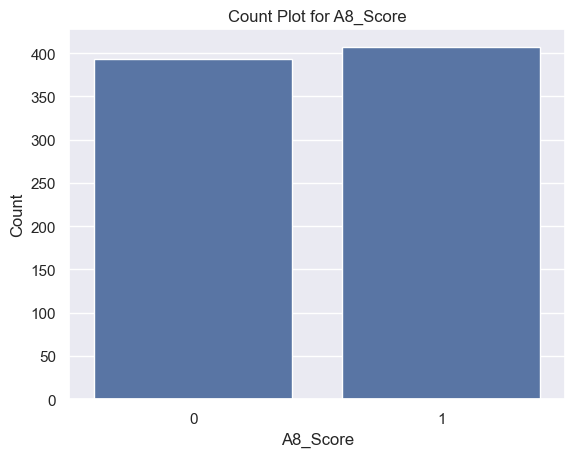

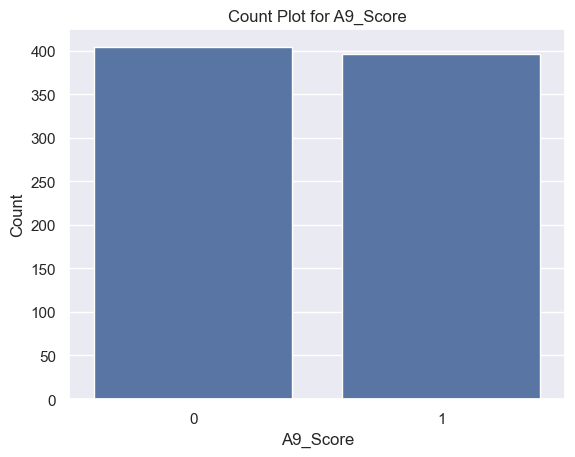

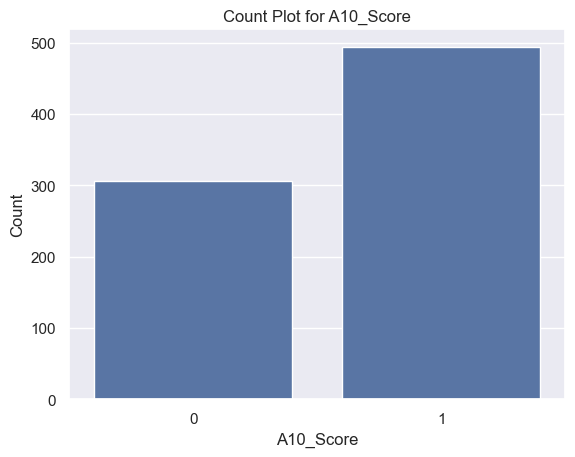

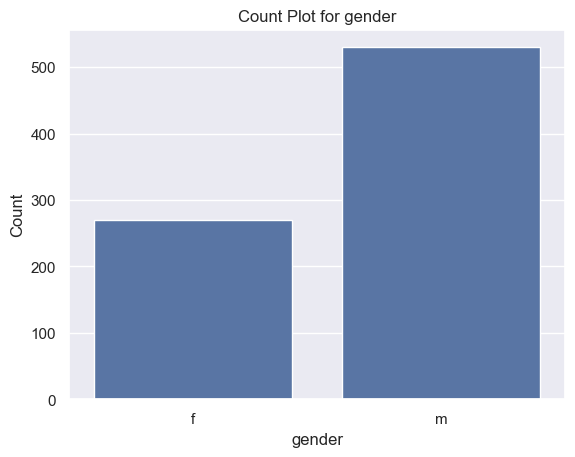

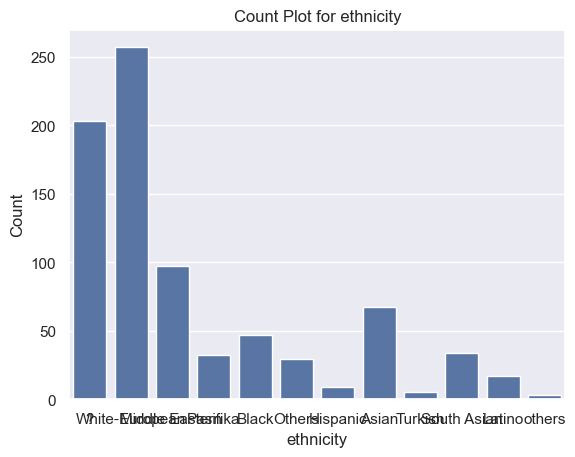

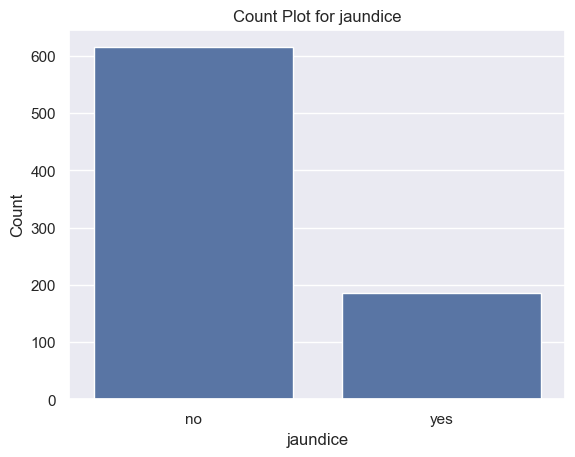

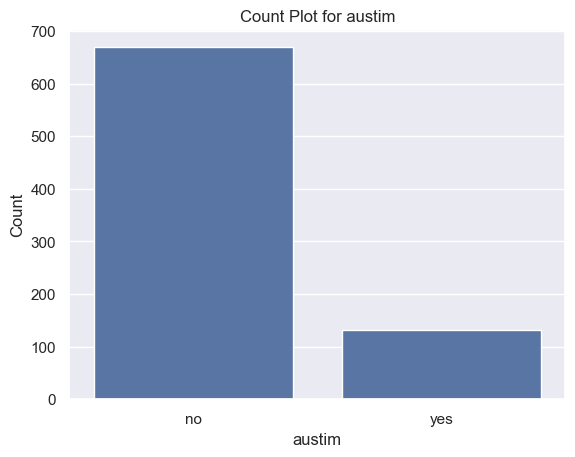

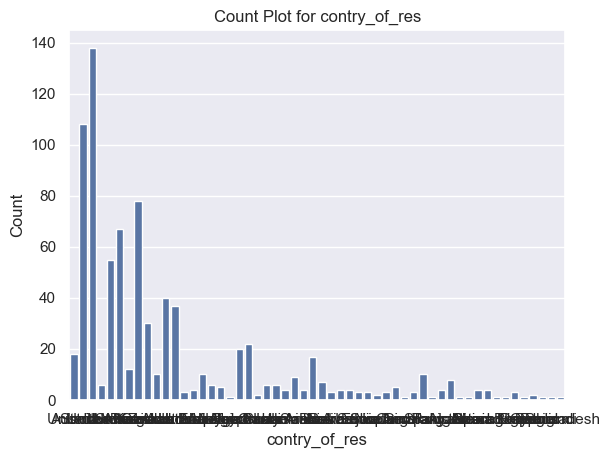

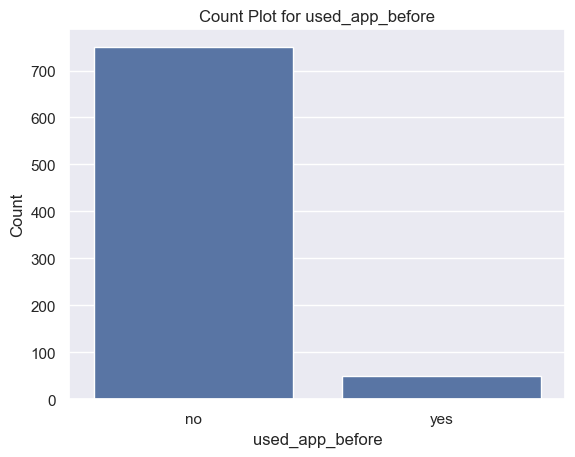

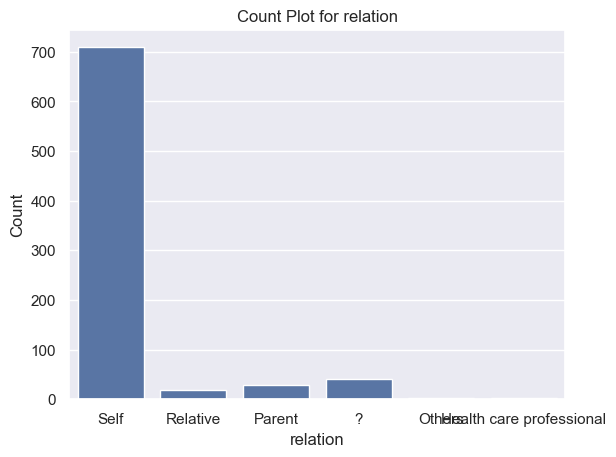

In [24]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

In [25]:
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

*Handling missing values in Categorical Columns*

In [26]:
df["ethnicity"] = df["ethnicity"].replace({"?": "Others", "others": "Others"})

In [27]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [28]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [29]:
df["relation"] = df["relation"].replace(
    {"?": "Others",
     "Relative": "Others",
     "Parent": "Others",
     "Health care professional": "Others"}
)

In [30]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [31]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


**Label Encoding**

In [32]:
# identify columns with "object" data type
object_columns = df.select_dtypes(include=["object"]).columns
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [33]:
# initialize a dictionary to store the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder   # saving the encoder for this column


# save the encoders as a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

**Heat Map Visualization**

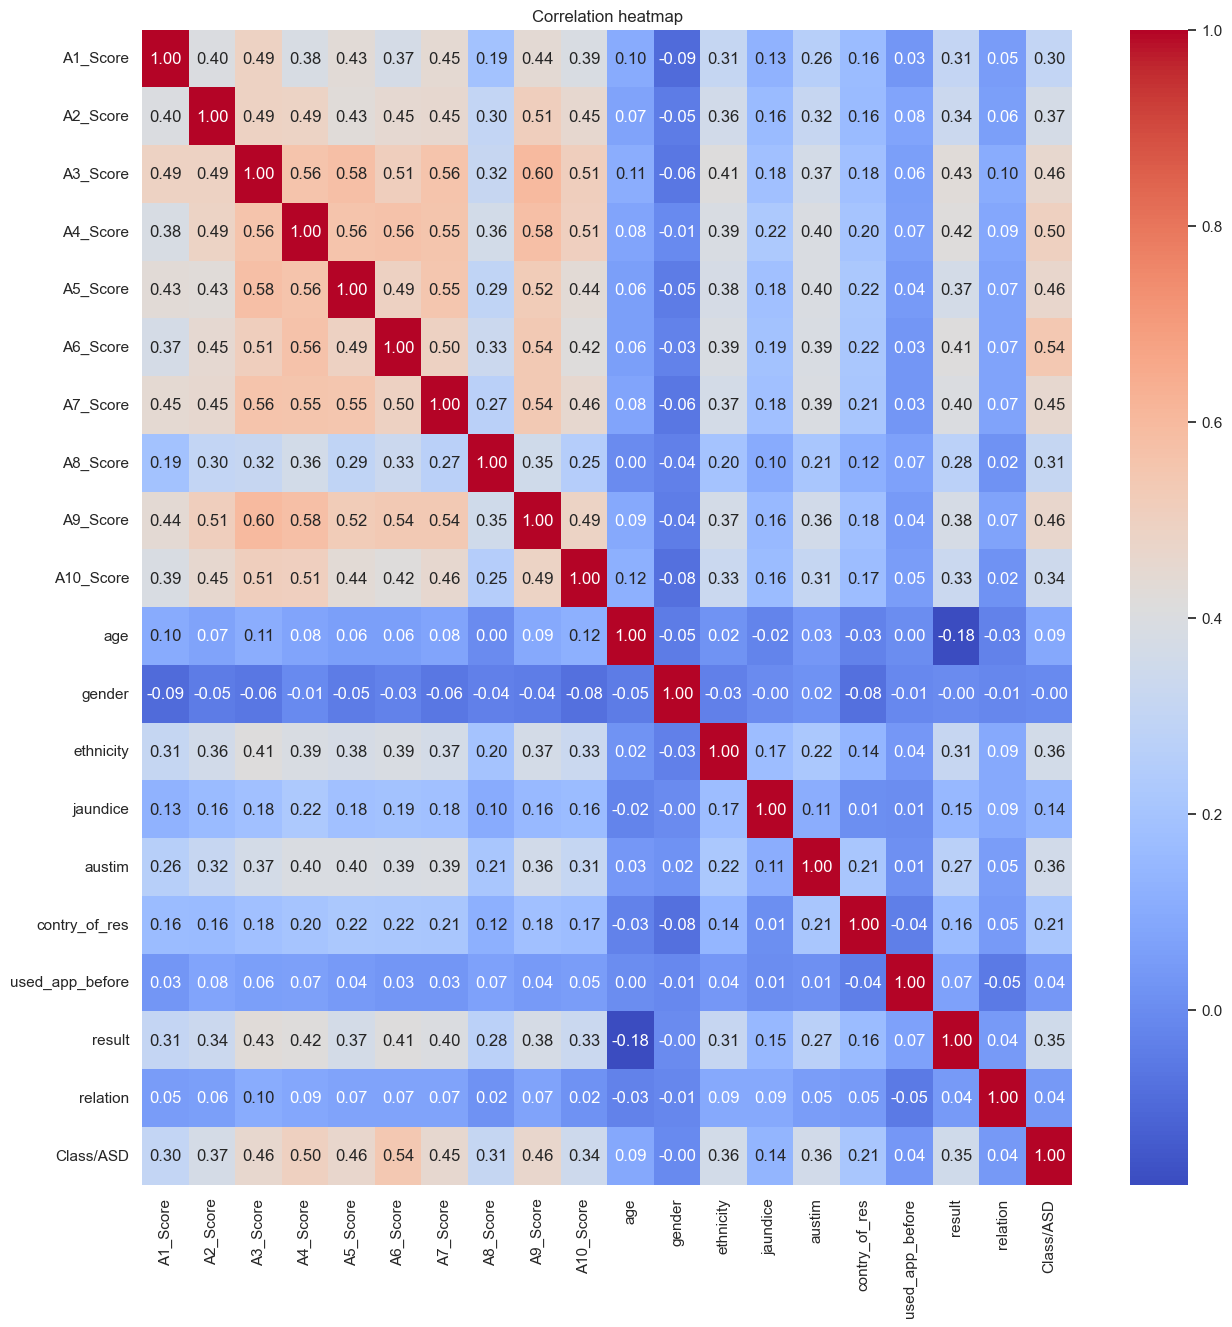

In [34]:
# correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

Observation
- Moderate Positive Correlations: Notable positive relationships exist between some scores, such as A1_Score and A2_Score.

- Negative Correlations: Age negatively correlates with both result and Class/ASD.

Key Correlations:

- "Result" is strongly positively correlated with "Class/ASD".

- "Used_app_before" and "Relation" show moderate positive correlations with "Result" and "Class/ASD".

**Model Building**

In [35]:
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Synthetic Minority Oversampling Technique(SMOTE)

In [37]:
smote = SMOTE(random_state=32)

In [38]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [39]:
print(y_train_smote.shape)

(906,)


In [40]:
print(y_train_smote.value_counts())

Class/ASD
0    453
1    453
Name: count, dtype: int64


Synthetic Minority Oversampling Technique (SMOTE) to balance an imbalanced dataset. It initializes SMOTE, applies it to the training data, and then prints the shape and class distribution of the resampled data, showing that the classes are now balanced. This is crucial for training a machine learning model effectively without bias.

*Model Training*

In [41]:
# dictionary of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [42]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.87
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.91
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.90
--------------------------------------------------


Observation

We performed 5-fold cross-validation on three different machine learning models: Decision Tree, Random Forest, and XGBoost. The purpose of cross-validation is to evaluate the performance of these models by splitting the training data into five subsets, training the model on four of these subsets, and then testing it on the remaining subset. This process is repeated five times, with each subset used once as the test set.

Here are the details of the results:

Decision Tree Model:

Cross-Validation Accuracy: 0.87

This means that the Decision Tree model achieved an average accuracy of 87% across the 5 folds.

Random Forest Model:

Cross-Validation Accuracy: 0.91

The Random Forest model performed better, with an average accuracy of 91% across the 5 folds.

XGBoost Model:

Cross-Validation Accuracy: 0.90

The XGBoost model also performed well, with an average accuracy of 90% across the 5 folds.

**Model Evaluation Summary**

In evaluating the three models:

- Random Forest Classifier emerged as the top performer, demonstrating the highest cross-validation accuracy (91%) and consistently strong results in precision and recall. Its robust performance highlights its suitability for detecting Autism Spectrum Disorder (ASD).
- XGBoost Classifier followed closely, offering a cross-validation accuracy of 90%. While it shares many strengths with the Random Forest, its slightly lower performance in certain metrics makes it the second-best option.
- Decision Tree Classifier underperformed relative to the other two models, achieving an accuracy of 86%. Despite this, it excelled at identifying true positives, which may be beneficial in specific scenarios where minimizing false negatives is crucial.


***Predictive Analytics for Autism Diagnosis: Conclusion***

This project aimed to leverage machine learning to predict Autism Spectrum Disorder (ASD) using a dataset containing behavioral scores, demographics, and medical history. We began by preprocessing the data, addressing missing values and outliers, and balancing the class distribution using SMOTE to ensure fair model training.

Three machine learning models were developed—Random Forest, XGBoost, and Decision Tree. The Random Forest Classifier outperformed the others, delivering the most accurate and reliable predictions.

Key Insights:

- Behavioral screening scores (e.g., A1_Score and A2_Score) were significant indicators of ASD likelihood.
- The result feature strongly correlated with ASD diagnosis, serving as a critical predictor.
- Balancing the dataset through SMOTE significantly improved model performance by ensuring an even representation of ASD and non-ASD cases.
- Random Forest's ability to handle feature interactions and imbalances made it the best-performing model.

This project highlights the potential of predictive analytics in healthcare, showcasing how data-driven approaches can enhance the early detection and diagnosis of ASD. The insights gained from this study can be further applied to refine screening tools, contributing to timely interventions and improved outcomes for individuals with ASD.